<a href="https://colab.research.google.com/github/galbendavids/CLALIT_Project/blob/main/new_modeling_clalit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
new_model_table=pd.read_csv('/content/drive/MyDrive/תואר שני/תזה/data/new_model_table1501.csv')

#DataFrame.dtypes for data must be int, float or bool.
#Did not expect the data types in fields Entry_Date, BirthDate, DeathDate



In [ ]:
new_model_table=new_model_table.drop(columns=['PID','Unnamed: 0'])
cols=new_model_table.columns
for i in cols:
  print  (i)

DiagnosisCode
SocialStateScore_first
SocialStateScore_last
ClinicSocialScore_first_בינוני
ClinicSocialScore_first_גבוה
ClinicSocialScore_first_נמוך
ClinicSocialScore_last_בינוני
ClinicSocialScore_last_גבוה
ClinicSocialScore_last_נמוך
Smoking_Per_Day
Smoking_לא מעשן/ת
Smoking_מעשן/ת
Alcohol_לא שותה אלכוהול
Alcohol_שותה אלכוהול
Drugs_לא משתמש/ת בסמים
Drugs_משתמש/ת בסמים
ImmigrationYear
GenderName_זכר
GenderName_לא ידוע
GenderName_נקבה
OriginName_אוגנדה
OriginName_אוזבקיסטאן
OriginName_אוסטריה
OriginName_אוסטרליה
OriginName_אוקראינה
OriginName_אורוגוואי
OriginName_אזרביג'אן
OriginName_איטליה
OriginName_אינדונזיה
OriginName_אירלנד
OriginName_אירן
OriginName_אל סלואדור
OriginName_אלבניה
OriginName_אלג'יריה
OriginName_אנגולה
OriginName_אסטוניה
OriginName_אפגניסטן
OriginName_אקואדור
OriginName_ארגנטינה
OriginName_אריתראה
OriginName_ארמניה
OriginName_ארצות הברית
OriginName_אתיופיה
OriginName_בדרך לארץ
OriginName_בולגריה
OriginName_בוליביה
OriginName_בורמה
OriginName_בחריין
OriginName_בילורוסיה

In [ ]:
new_model_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115058 entries, 0 to 115057
Columns: 151 entries, DiagnosisCode to Entry_Date_habits_year
dtypes: float64(18), int64(133)
memory usage: 132.6 MB


In [ ]:
new_model_table.dtypes

DiagnosisCode                     float64
SocialStateScore_first            float64
SocialStateScore_last             float64
ClinicSocialScore_first_בינוני    float64
ClinicSocialScore_first_גבוה      float64
                                   ...   
SectorName_אחר                      int64
SectorName_יהודי                    int64
SectorName_ערבי                     int64
birth_year                          int64
Entry_Date_habits_year            float64
Length: 151, dtype: object

In [ ]:
from xgboost import XGBClassifier

y=new_model_table[['DiagnosisCode']]
X=new_model_table.drop(columns=['DiagnosisCode'])
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)


In [ ]:


xgbc = XGBClassifier(gamma=2, learning_rate=0.3,max_depth=24,n_estimators=300,scale_pos_weight=50000)
print(xgbc)

xgbc.fit(X_train, Y_train)


from sklearn.metrics import confusion_matrix
ypred = xgbc.predict(X_test)
cm = confusion_matrix(Y_test,ypred) 
print(cm)


XGBClassifier(gamma=2, learning_rate=0.3, max_depth=24, n_estimators=300,
              scale_pos_weight=50000)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[13854  6597]
 [ 1590   971]]


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import cross_validate


scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc','balanced_accuracy','precision_weighted','recall_weighted']
scores = cross_validate(xgbc, X_train, Y_train, scoring=scoring, cv=2,return_estimator=True)

sorted(scores.keys())
fit_time = scores['fit_time']
score_time = scores['score_time']
accuracy = scores['test_accuracy']
precision = scores['test_precision_macro']
recall = scores['test_recall_macro']
f1 = scores['test_f1_weighted']
roc = scores['test_roc_auc']
ba = scores['test_balanced_accuracy']




/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

In [ ]:
accuracy

array([0.66783999, 0.67057775])

In [ ]:
precision

array([0.51317423, 0.51410294])

In [ ]:
recall#define best model

array([0.52759792, 0.52939336])

In [ ]:
roc

array([0.55038256, 0.55150969])

In [ ]:
ba

array([0.52759792, 0.52939336])

In [ ]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pickle

def confusion_matrix(prediction_model):
  # Plot non-normalized confusion matrix
  titles_options = [
                    ("Normalized confusion matrix", 'true')]
  for title, normalize in titles_options:
      disp = plot_confusion_matrix(prediction_model, X_test, Y_test,
                                  cmap=plt.cm.Blues,
                                  normalize=normalize)
      disp.ax_.set_title(title)

      print(title)
      print(disp.confusion_matrix)

  plt.show()

def best_model(scores):
 estimators=scores['estimator']
 recall=scores['test_precision_macro']
 max_index = np.argmax(recall, axis=0)
 prediction_model=estimators[max_index]
 return prediction_model





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.70373087 0.29626913]
 [0.66614604 0.33385396]]


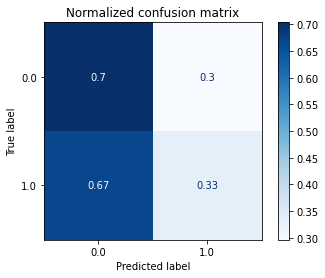

'\n\nprediction_model = xgbc\n#confusion_matrix(prediction_model)\n'

In [ ]:
import pickle
import matplotlib.pyplot as plt


prediction_model = best_model(scores)
confusion_matrix(prediction_model)
'''

prediction_model = xgbc
#confusion_matrix(prediction_model)
'''

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


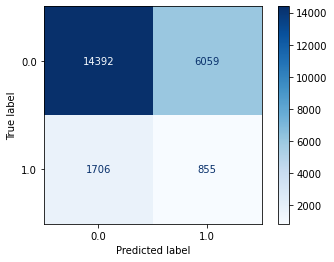

In [ ]:
plot_confusion_matrix(prediction_model, X_test, Y_test,cmap=plt.cm.Blues)  
plt.show()

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

<Figure size 360000x103680 with 0 Axes>

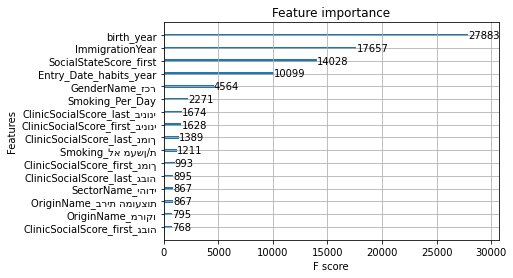

In [ ]:

pyplot.figure(figsize=(5000,1440))
plot_importance(prediction_model,max_num_features=16)

pyplot.show()
